# **Ejercicio 2**


In [32]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# importamos elim_gaussiana
sys.path.append(os.getcwd())
from elim_gaussiana import elim_gaussiana

Definimos la matriz $B_n$:

In [ ]:
def matriz_B(n):
    if n < 2:
        raise ValueError("El tamaño de la matriz debe ser al menos 2.")
    
    B = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j or j == n-1: B[i, j] = 1
            if i > j: B[i, j] = -1
    return B

Realizamos el gráfico que muestra la cantidad de operaciones en función del tamaño de la matriz:

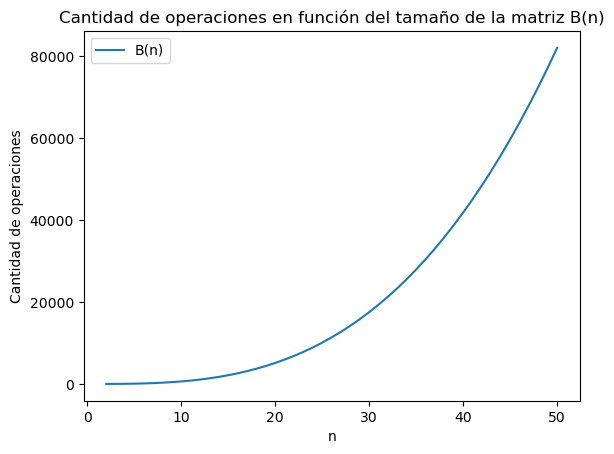

In [34]:
N = 50
x = np.arange(2, N+1)
array_de_operaciones = np.zeros(N-1)
for n in range(2, N+1):
    B = matriz_B(n)
    L, U, cant_oper = elim_gaussiana(B)
    array_de_operaciones[n-2] = cant_oper

plt.plot(x, array_de_operaciones, label="B(n)")
plt.xlabel("n")
plt.ylabel("Cantidad de operaciones")
plt.title("Cantidad de operaciones en función del tamaño de la matriz B(n)")
plt.legend()
plt.show()

Verifiquemos que, siendo $B_n = L_n U_n$ la descomposición $LU$ de $B_n$, $\|U_n\|_\infty = 2^{n-1}$:

In [31]:
n = 4
B = matriz_B(n)
print(f"Matriz B({n}):")
print(B)
L, U, cant_oper = elim_gaussiana(B)
print(f"\nMatriz L:\n{L}")
print(f"\nMatriz U:\n{U}")
print(f"\nCantidad de operaciones: {cant_oper}")

print('Norma infinito de U:', np.max(np.sum(np.abs(U), axis=1)) )
print('Valor de 2^(n-1):', 2**(n-1))

print('Coincidencia entre la norma infinito de U y 2^(n-1):',
      np.max(np.sum(np.abs(U), axis=1)) == 2**(n-1))

Matriz B(4):
[[ 1.  0.  0.  1.]
 [-1.  1.  0.  1.]
 [-1. -1.  1.  1.]
 [-1. -1. -1.  1.]]

Matriz L:
[[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [-1. -1.  1.  0.]
 [-1. -1. -1.  1.]]

Matriz U:
[[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 4.]
 [0. 0. 0. 8.]]

Cantidad de operaciones: 34
Norma infinito de U: 8.0
Valor de 2^(n-1): 8
Coincidencia entre la norma infinito de U y 2^(n-1): True
